In [1]:
import numpy as np
import torch
from tqdm import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn
import sys
seaborn.set()

import warnings
warnings.filterwarnings("ignore")

import reservoir
import computekernel
from reckernel import RecKernel
from kuramoto import KS
%load_ext autoreload
%autoreload 2

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

(9, 20, 40)


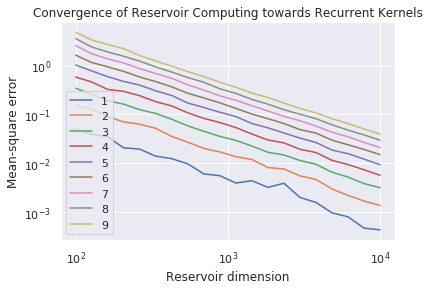

In [17]:
# Plots
ncurves = 10
alin11 = np.load('out/200521_conv_rc_lin_len1to10_nres1e2to1e4_in1res1.npy')
nres = np.logspace(2, 4, num=20, dtype=int)
length = np.arange(start=1, stop=10, step=1)
print(alin11.shape)
plt.loglog(nres, np.mean(alin11, axis=2)[:ncurves, :].T)
plt.legend(length[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

(9, 20, 40)


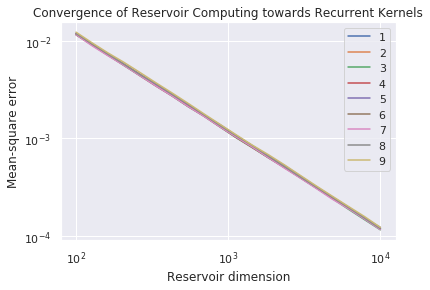

In [18]:
# Plots
ncurves = 10
alin1025 = np.load('out/200521_conv_rc_lin_len1to10_nres1e2to1e4_in1res025.npy')
nres = np.logspace(2, 4, num=20, dtype=int)
length = np.arange(start=1, stop=10, step=1)
print(alin1025.shape)
plt.loglog(nres, np.mean(alin1025, axis=2)[:ncurves, :].T)
plt.legend(length[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

(9, 20, 40)


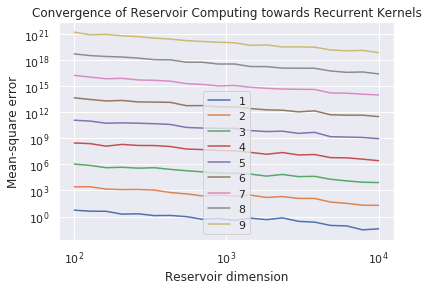

In [19]:
# Plots
ncurves = 10
alin14 = np.load('out/200521_conv_rc_lin_len1to10_nres1e2to1e4_in1res4.npy')
nres = np.logspace(2, 4, num=20, dtype=int)
length = np.arange(start=1, stop=10, step=1)
print(alin14.shape)
plt.loglog(nres, np.mean(alin14, axis=2)[:ncurves, :].T)
plt.legend(length[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

(9, 20, 40)


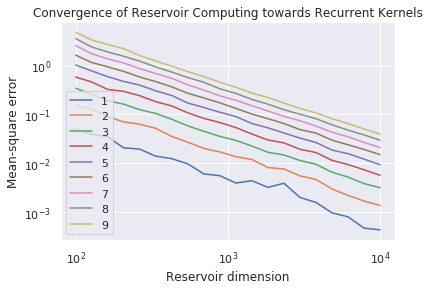

In [17]:
# Plots
ncurves = 10
alin11 = np.load('out/200521_conv_rc_lin_len1to10_nres1e2to1e4_in1res1.npy')
nres = np.logspace(2, 4, num=20, dtype=int)
length = np.arange(start=1, stop=10, step=1)
print(alin11.shape)
plt.loglog(nres, np.mean(alin11, axis=2)[:ncurves, :].T)
plt.legend(length[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

(19, 20, 40)


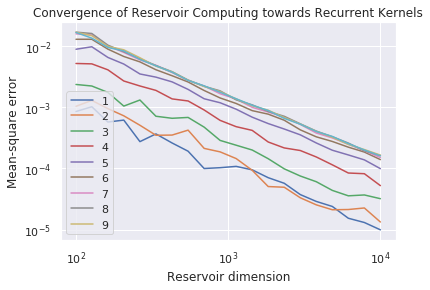

In [20]:
# Plots
ncurves = 10
asin0254 = np.load('out/200520_conv_rc_asin_len1to20_nres1e2to1e4_in025res4.npy')
nres = np.logspace(2, 4, num=20, dtype=int)
length = np.arange(start=1, stop=10, step=1)
print(asin0254.shape)
plt.loglog(nres, np.mean(asin0254, axis=2)[:ncurves, :].T)
plt.legend(length[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

(9, 15, 40)


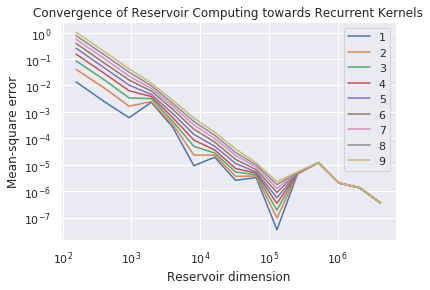

In [24]:
# Plots
ncurves = 20
alinsrc = np.load('out/200521_conv_src_lin_len1to10_nres2p8to2p22_in1res1.npy')
first_pow = 8
last_pow = 22  # 2**20 => ~10^6
nres = np.logspace(first_pow, last_pow, num=last_pow-first_pow+1, base=2., dtype=int) - 100
length = np.arange(start=1, stop=20, step=1)
print(alinsrc.shape)
plt.loglog(nres, np.mean(alinsrc, axis=2)[:ncurves, :].T)
plt.legend(length[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

Text(0, 0.5, 'Mean-square error')

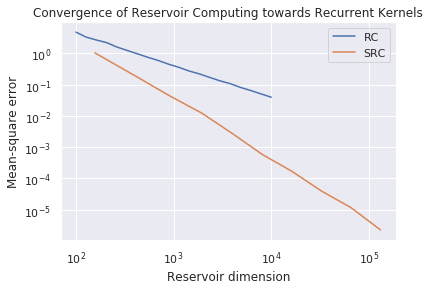

In [31]:
lin_rc = np.mean(alin11[-1, :, :], axis=1)
nres_rc = np.logspace(2, 4, num=20, dtype=int)
first_pow = 8
last_pow = 17  # 2**20 => ~10^6
lin_src = np.mean(alinsrc[-1, :last_pow-first_pow+1, :], axis=1)
nres_src = np.logspace(first_pow, last_pow, num=last_pow-first_pow+1, base=2., dtype=int) - 100

plt.loglog(nres_rc, lin_rc)
plt.loglog(nres_src, lin_src)
plt.legend(['RC', 'SRC'])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error')

Text(0, 0.5, 'Mean-square error')

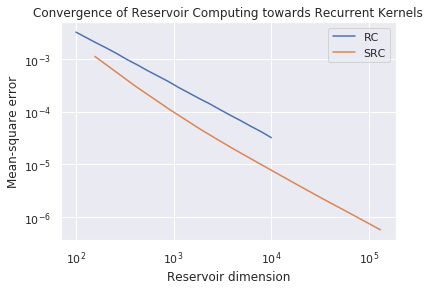

In [38]:
asinrc = np.load('out/200520_conv_rc_asin_len1to20_nres1e2to1e4_in1res1.npy')
asinsrc = np.load('out/200521_conv_src_asin_len1to10_nres2p8to2p22_in1res1.npy')

time_idx = 8
lin_rc = np.mean(asinrc[time_idx, :, :], axis=1)
nres_rc = np.logspace(2, 4, num=20, dtype=int)
first_pow = 8
last_pow = 17  # 2**20 => ~10^6
lin_src = np.mean(asinsrc[time_idx, :last_pow-first_pow+1, :], axis=1)
nres_src = np.logspace(first_pow, last_pow, num=last_pow-first_pow+1, base=2., dtype=int) - 100

plt.loglog(nres_rc, lin_rc)
plt.loglog(nres_src, lin_src)
plt.legend(['RC', 'SRC'])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error')

Text(0, 0.5, 'Mean-square error')

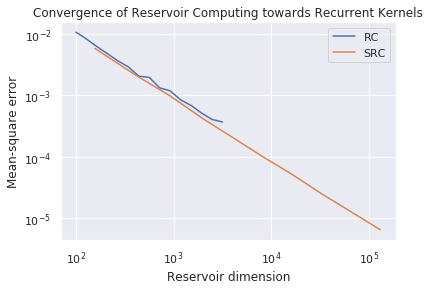

In [35]:
rbfrc = np.load('out/200520_conv_rc_rbf_len1to20_nres1e2to1e35_in1res1.npy')
rbfsrc = np.load('out/200521_conv_src_rbf_len1to10_nres2p8to2p22_in1res1.npy')

time_idx = 8
lin_rc = np.mean(rbfrc[time_idx, :, :], axis=1)
nres_rc = np.logspace(2, 3.5, num=15, dtype=int)
first_pow = 8
last_pow = 17  # 2**20 => ~10^6
lin_src = np.mean(rbfsrc[time_idx, :last_pow-first_pow+1, :], axis=1)
nres_src = np.logspace(first_pow, last_pow, num=last_pow-first_pow+1, base=2., dtype=int) - 100

plt.loglog(nres_rc, lin_rc)
plt.loglog(nres_src, lin_src)
plt.legend(['RC', 'SRC'])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error')

Text(0, 0.5, 'Mean-square error')

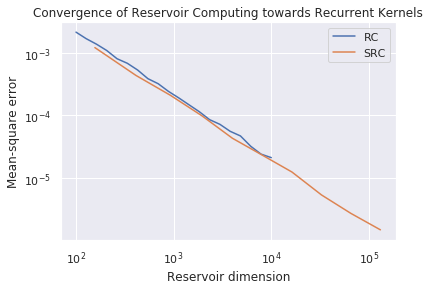

In [37]:
acosrc = np.load('out/200520_conv_rc_acos_len1to20_nres1e2to1e4_in1res1.npy')
acossrc = np.load('out/200521_conv_src_acos_len1to10_nres2p8to2p22_in1res1.npy')

time_idx = 8
lin_rc = np.mean(acosrc[time_idx, :, :], axis=1)
nres_rc = np.logspace(2, 4, num=20, dtype=int)
first_pow = 8
last_pow = 17  # 2**20 => ~10^6
lin_src = np.mean(acossrc[time_idx, :last_pow-first_pow+1, :], axis=1)
nres_src = np.logspace(first_pow, last_pow, num=last_pow-first_pow+1, base=2., dtype=int) - 100

plt.loglog(nres_rc, lin_rc)
plt.loglog(nres_src, lin_src)
plt.legend(['RC', 'SRC'])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error')

Text(0, 0.5, 'Mean-square error')

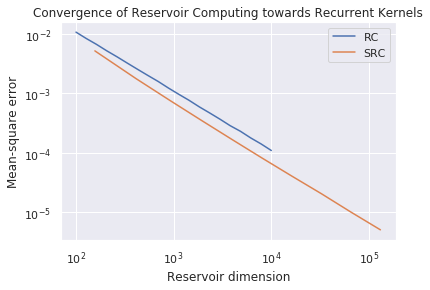

In [39]:
asin2rc = np.load('out/200520_conv_rc_asin2_len1to20_nres1e2to1e4_in1res1.npy')
asin2src = np.load('out/200521_conv_src_asin2_len1to10_nres2p8to2p22_in1res1.npy')

time_idx = 8
lin_rc = np.mean(asin2rc[time_idx, :, :], axis=1)
nres_rc = np.logspace(2, 4, num=20, dtype=int)
first_pow = 8
last_pow = 17  # 2**20 => ~10^6
lin_src = np.mean(asin2src[time_idx, :last_pow-first_pow+1, :], axis=1)
nres_src = np.logspace(first_pow, last_pow, num=last_pow-first_pow+1, base=2., dtype=int) - 100

plt.loglog(nres_rc, lin_rc)
plt.loglog(nres_src, lin_src)
plt.legend(['RC', 'SRC'])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error')

# Old plots

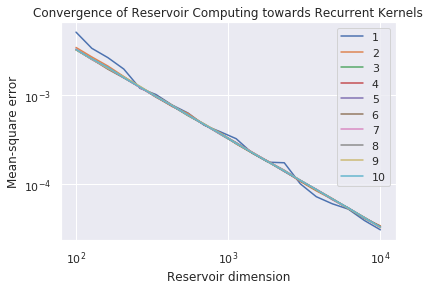

In [6]:
# Plots
ncurves = 10
asin11 = np.load('out/200520_conv_rc_asin_len1to20_nres1e2to1e4_in1res1.npy')
nres11 = np.logspace(2, 4, num=20, dtype=int)
len11 = np.arange(start=1, stop=20, step=1)
plt.loglog(nres11, np.mean(asin11, axis=2)[:ncurves, :].T)
plt.legend(len11[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

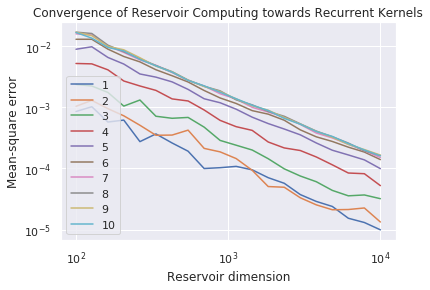

In [8]:
# Plots
ncurves = 10
asin11 = np.load('out/200520_conv_rc_asin_len1to20_nres1e2to1e4_in025res4.npy')
nres11 = np.logspace(2, 4, num=20, dtype=int)
len11 = np.arange(start=1, stop=20, step=1)
plt.loglog(nres11, np.mean(asin11, axis=2)[:ncurves, :].T)
plt.legend(len11[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

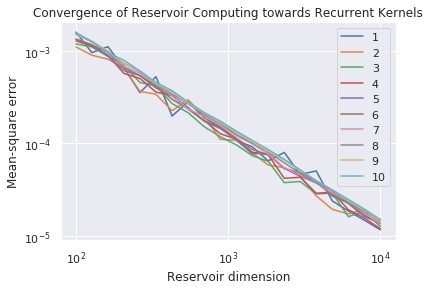

In [9]:
# Plots
ncurves = 10
asin11 = np.load('out/200520_conv_rc_asin_len1to20_nres1e2to1e4_in025res1.npy')
nres11 = np.logspace(2, 4, num=20, dtype=int)
len11 = np.arange(start=1, stop=20, step=1)
plt.loglog(nres11, np.mean(asin11, axis=2)[:ncurves, :].T)
plt.legend(len11[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

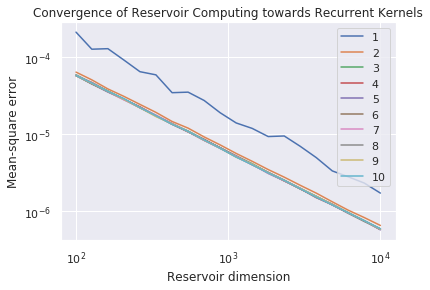

In [10]:
# Plots
ncurves = 10
asin11 = np.load('out/200520_conv_rc_asin_len1to20_nres1e2to1e4_in025res025.npy')
nres11 = np.logspace(2, 4, num=20, dtype=int)
len11 = np.arange(start=1, stop=20, step=1)
plt.loglog(nres11, np.mean(asin11, axis=2)[:ncurves, :].T)
plt.legend(len11[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

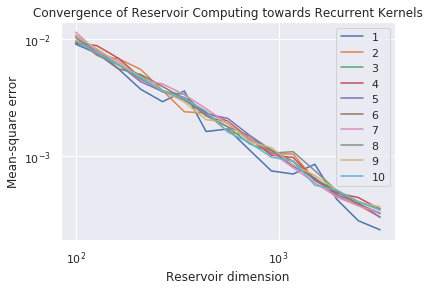

In [11]:
# Plots
ncurves = 10
asin11 = np.load('out/200520_conv_rc_rbf_len1to20_nres1e2to1e35_in1res1.npy')
nres11 = np.logspace(2, 3.5, num=15, dtype=int)
len11 = np.arange(start=1, stop=20, step=1)
plt.loglog(nres11, np.mean(asin11, axis=2)[:ncurves, :].T)
plt.legend(len11[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

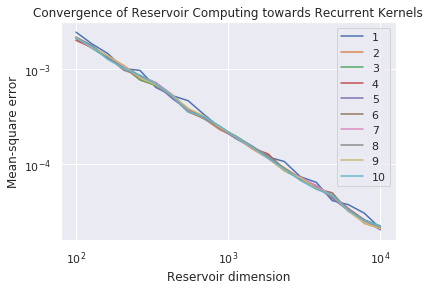

In [13]:
# Plots
ncurves = 10
asin11 = np.load('out/200520_conv_rc_acos_len1to20_nres1e2to1e4_in1res1.npy')
nres11 = np.logspace(2, 4, num=20, dtype=int)
len11 = np.arange(start=1, stop=20, step=1)
plt.loglog(nres11, np.mean(asin11, axis=2)[:ncurves, :].T)
plt.legend(len11[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');

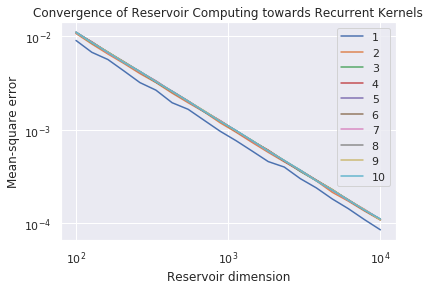

In [14]:
# Plots
ncurves = 10
asin11 = np.load('out/200520_conv_rc_asin2_len1to20_nres1e2to1e4_in1res1.npy')
nres11 = np.logspace(2, 4, num=20, dtype=int)
len11 = np.arange(start=1, stop=20, step=1)
plt.loglog(nres11, np.mean(asin11, axis=2)[:ncurves, :].T)
plt.legend(len11[:ncurves])
plt.title('Convergence of Reservoir Computing towards Recurrent Kernels')
plt.xlabel('Reservoir dimension')
plt.ylabel('Mean-square error');